# Load data pima

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤족의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정값(0또는 1)

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**앞 예제에서 사용된 get_clf_eval()과  precision_recall_curve_plot()재 로딩**

In [5]:
# 수정된 get_clf_eval() 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')
    
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로 y축은 정밀도, 재현울 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

# EDA

## Logistic Regression으로 학습및 예측 수행

In [7]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맽 끝이 Outcome 컬럼으로 레이블 값임, 컬럼 위치 -1 을 이용하여 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# roc_auc_score 수정에 따른 추가
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[105  20]
 [ 32  35]]
정확도: 0.7292, 정밀도: 0.6364, 재현율: 0.5224, F1: 0.5738, AUC: 0.8309


**Precision recall 곡선 그림**

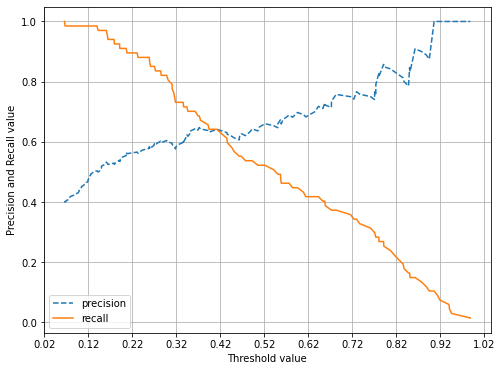

In [12]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

**'Glucose'피처스의 분포도**

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

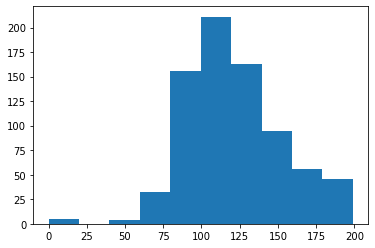

In [14]:
plt.hist(diabetes_data['Glucose'], bins=10)

**0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산**

In [17]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 퍼센트는 {(100*zero_count)/total_count:.2f} %')

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


**0값을 평균값으로 대체**

In [18]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

**StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용하고 0값을 평균값으로 대체한 데이터 세트로 학습/예측**

In [28]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
sclaer = StandardScaler()
X_scaled = sclaer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Logistic Regression으로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# roc_auc_score 수정에 따른 추가
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[106  19]
 [ 32  35]]
정확도: 0.7344, 정밀도: 0.6481, 재현율: 0.5224, F1: 0.5785, AUC: 0.8260


**분류결정 임계값을 변경하면서 성능 측정**

In [40]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임계값: {custom_threshold}')
        # roc_auc_score
        get_clf_eval(y_test, custom_predict, pred_proba_c1)
        
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.3
오차 행렬
[[90 35]
 [15 52]]
정확도: 0.7396, 정밀도: 0.5977, 재현율: 0.7761, F1: 0.6753, AUC: 0.8260
임계값: 0.33
오차 행렬
[[95 30]
 [19 48]]
정확도: 0.7448, 정밀도: 0.6154, 재현율: 0.7164, F1: 0.6621, AUC: 0.8260
임계값: 0.36
오차 행렬
[[97 28]
 [22 45]]
정확도: 0.7396, 정밀도: 0.6164, 재현율: 0.6716, F1: 0.6429, AUC: 0.8260
임계값: 0.39
오차 행렬
[[100  25]
 [ 25  42]]
정확도: 0.7396, 정밀도: 0.6269, 재현율: 0.6269, F1: 0.6269, AUC: 0.8260
임계값: 0.42
오차 행렬
[[101  24]
 [ 28  39]]
정확도: 0.7292, 정밀도: 0.6190, 재현율: 0.5821, F1: 0.6000, AUC: 0.8260
임계값: 0.45
오차 행렬
[[102  23]
 [ 30  37]]
정확도: 0.7240, 정밀도: 0.6167, 재현율: 0.5522, F1: 0.5827, AUC: 0.8260
임계값: 0.48
오차 행렬
[[105  20]
 [ 31  36]]
정확도: 0.7344, 정밀도: 0.6429, 재현율: 0.5373, F1: 0.5854, AUC: 0.8260
임계값: 0.5
오차 행렬
[[106  19]
 [ 32  35]]
정확도: 0.7344, 정밀도: 0.6481, 재현율: 0.5224, F1: 0.5785, AUC: 0.8260


In [41]:
# 임계값을 0.5로 선정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

# roc_auc_score 관련 수정
get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[105  20]
 [ 31  36]]
정확도: 0.7344, 정밀도: 0.6429, 재현율: 0.5373, F1: 0.5854, AUC: 0.8260
